In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [2]:
df = pd.read_csv('Datasets/car_dataset.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

<Axes: xlabel='Fuel_Type', ylabel='count'>

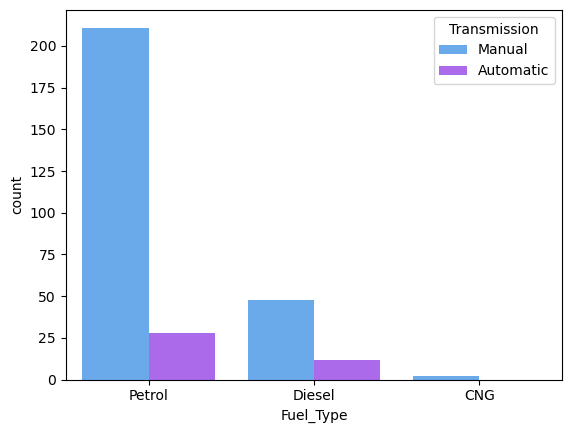

In [12]:
sns.countplot(x=df['Fuel_Type'], palette='cool', hue=df['Transmission'])

In [14]:
df.drop(['Car_Name'], axis=1, inplace=True)

In [16]:
df.dtypes

Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [18]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')

In [19]:
ohetransform = ohe.fit_transform(df[['Fuel_Type', 'Seller_Type','Transmission']])

In [20]:
ohetransform

,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
296,0.0,1.0,0.0,1.0,0.0,0.0,1.0
297,0.0,0.0,1.0,1.0,0.0,0.0,1.0
298,0.0,0.0,1.0,1.0,0.0,0.0,1.0
299,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [21]:
df = pd.concat([df,ohetransform], axis=1)

In [22]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [24]:
df.drop(['Fuel_Type','Transmission','Seller_Type'], axis=1, inplace=True)

In [25]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,5.59,27000,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,2013,4.75,9.54,43000,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,2017,7.25,9.85,6900,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,2011,2.85,4.15,5200,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,2014,4.60,6.87,42450,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [26]:
X = df.drop(['Selling_Price'], axis=1)

In [27]:
y = df['Selling_Price']

In [28]:
X['Owner'].value_counts()

Owner
0    290
1     10
3      1
Name: count, dtype: int64

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [43]:
mp = {
    'LinearRegression':{
        'model':LinearRegression(),
        'params':{
            'fit_intercept':[True, False]
        }
    },
    'Lasso':{
        'model':Lasso(),
        'params':{
            'alpha':np.logspace(-4,4,20)
        }
    },
    'Ridge':{
        'model':Ridge(),
        'params':{
            'alpha':np.logspace(-4,4,20)
        }
    },
    'DecisionTree':{
        'model':DecisionTreeRegressor(),
        'params':{
            'max_depth':[5,8,10,12],
            'min_samples_split':[3,5,7],
            'criterion':['squared_error','friedman_mse'],
            'splitter':['best','random'],
        }
    },
    'RandomForest':{
        'model':RandomForestRegressor(),
        'params':{
            'n_estimators':[25,50,100],
            'max_depth':[5,8,10,12],
            'min_samples_split':[3,5,7],
            'criterion':['squared_error','friedman_mse'],
        }
    },
    'GradientBoosting':{
        'model':GradientBoostingRegressor(n_iter_no_change=10, validation_fraction=0.1),
        'params':{
            'n_estimators':[25,50,100],
            'max_depth':[5,7,9],
            'learning_rate':[0.001,0.01,0.1,0.5]
        }
        
    }
}

In [44]:
for model, param in mp.items():
    print(model)
    print(param)
    print("********************************************")

LinearRegression
{'model': LinearRegression(), 'params': {'fit_intercept': [True, False]}}
********************************************
Lasso
{'model': Lasso(), 'params': {'alpha': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])}}
********************************************
Ridge
{'model': Ridge(), 'params': {'alpha': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])}}
*************

In [58]:
scores = {}
models = []
for name, model in mp.items():
    gcv = GridSearchCV(model['model'], param_grid = model['params'], cv=3, scoring='r2', n_jobs=-1, error_score='raise')
    gcv.fit(X_train, y_train)
    scores[name]=r2_score(y_test, gcv.predict(X_test))
    models.append({'model':name, 'params':gcv.best_params_, 'best_model':gcv.best_estimator_,'model_id':name+'_best'})

In [59]:
scores

{'LinearRegression': 0.8489813024901274,
 'Lasso': 0.8490033618022932,
 'Ridge': 0.8499742091923952,
 'DecisionTree': 0.9501234187839347,
 'RandomForest': 0.9529137520944565,
 'GradientBoosting': 0.9634731341495948}

In [60]:
models

[{'model': 'LinearRegression',
  'params': {'fit_intercept': False},
  'best_model': LinearRegression(fit_intercept=False),
  'model_id': 'LinearRegression_best'},
 {'model': 'Lasso',
  'params': {'alpha': 0.0001},
  'best_model': Lasso(alpha=0.0001),
  'model_id': 'Lasso_best'},
 {'model': 'Ridge',
  'params': {'alpha': 1.623776739188721},
  'best_model': Ridge(alpha=1.623776739188721),
  'model_id': 'Ridge_best'},
 {'model': 'DecisionTree',
  'params': {'criterion': 'friedman_mse',
   'max_depth': 10,
   'min_samples_split': 5,
   'splitter': 'best'},
  'best_model': DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
                        min_samples_split=5),
  'model_id': 'DecisionTree_best'},
 {'model': 'RandomForest',
  'params': {'criterion': 'friedman_mse',
   'max_depth': 10,
   'min_samples_split': 3,
   'n_estimators': 25},
  'best_model': RandomForestRegressor(criterion='friedman_mse', max_depth=10,
                        min_samples_split=3, n_estimators=25),

In [61]:
best_model_name = max(scores, key=scores.get)
best_model_name

'GradientBoosting'

In [70]:
final_model = next(m['best_model'] for m in models if m['model']==best_model_name)
model_params = next(m['params'] for m in models if m['model']==best_model_name)

In [69]:
final_model

GradientBoostingRegressor(learning_rate=0.5, max_depth=5, n_iter_no_change=10)

In [71]:
model_params

{'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 100}

In [72]:
y_pred = final_model.predict(X_test)

In [74]:
print('R2 score: ', r2_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))

R2 score:  0.9634731341495948
MSE:  0.8414177055583136
